# Initial Setup and Data Loading

In [ ]:
%pip install --upgrade pip
%pip install xgboost scikit-learn kagglehub jupyter ipykernel ipywidgets lightgbm seaborn plotly
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 97.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 111.2 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter-server 1.24.0
    Uninstalling jupyter

# Data Loading and Initial Exploration

In [ ]:
import kagglehub
data_path = kagglehub.dataset_download('mahdiehhajian/bank-marketing')+ '/bank/bank-full.csv'
print(data_path)
dataset = pd.read_csv(data_path, sep=';')
data=dataset.copy()

100%|██████████| 1.01M/1.01M [00:00<00:00, 97.2MB/s]

Extracting files...
/root/.cache/kagglehub/datasets/mahdiehhajian/bank-marketing/versions/1/bank/bank-full.csv


In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
18731,32,services,married,primary,no,-109,yes,no,cellular,31,jul,77,5,-1,0,unknown,no
42127,35,admin.,divorced,secondary,no,1224,yes,no,cellular,3,nov,187,1,-1,0,unknown,yes
11833,36,blue-collar,married,primary,no,44,no,no,unknown,20,jun,11,2,-1,0,unknown,no
22454,32,technician,single,secondary,no,0,no,no,cellular,22,aug,114,2,-1,0,unknown,no
7948,36,management,married,secondary,no,80,yes,no,unknown,30,may,251,3,-1,0,unknown,no
4965,32,blue-collar,single,secondary,no,15341,no,no,unknown,21,may,738,3,-1,0,unknown,no
14156,39,blue-collar,married,primary,no,0,yes,no,cellular,11,jul,117,2,-1,0,unknown,no
44740,25,student,single,tertiary,no,20,no,no,cellular,8,sep,127,2,-1,0,unknown,no
42270,39,admin.,married,secondary,no,260,yes,no,cellular,13,nov,226,1,94,4,success,yes
33042,39,admin.,married,secondary,no,456,yes,no,cellular,17,apr,193,3,-1,0,unknown,no


In [ ]:
data.shape

(45211, 17)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
data.duplicated().sum()

0

Based on the analysis performed so far, let's summarize the findings:

*   The dataset has been loaded and explored using `head()`, `sample()`, `shape`, `info()`, and `describe()` methods.
*   The dataset contains both numerical and categorical features.
*   The shape of the dataset is (45211, 17).
*   There are no duplicated rows in the dataset.

Now, let's add some insights and observations based on the code and outputs.

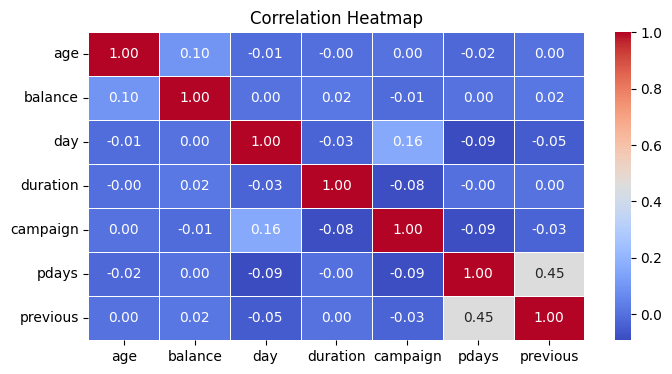

In [ ]:
# Compute the correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Highly Correlated Feature Pairs (Threshold >= 0.8):
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []


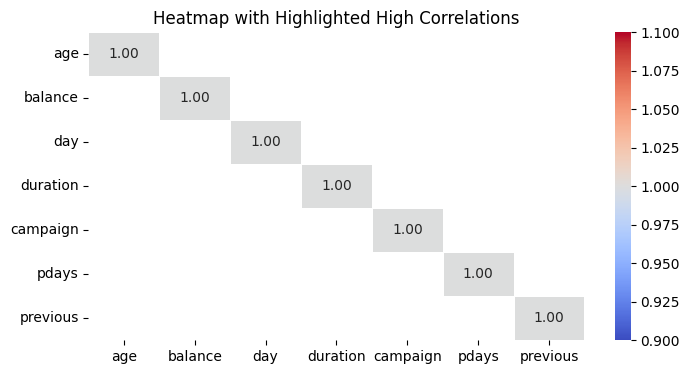

In [ ]:
# Step: Check for Multicollinearity (Optimized)
# Use the correlation matrix computed earlier (assuming it's stored in 'correlation_matrix')
threshold = 0.8

# Consider only the upper triangle of the correlation matrix to avoid redundant pairs
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Stack and filter the pairs where absolute correlation exceeds the threshold
high_corr_pairs = (
    upper_tri.stack().reset_index()
    .rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: "Correlation"})
)
high_corr_pairs = high_corr_pairs[high_corr_pairs["Correlation"].abs() >= threshold]
high_corr_pairs = high_corr_pairs.sort_values(by="Correlation", ascending=False)

print("Highly Correlated Feature Pairs (Threshold >= 0.8):")
print(high_corr_pairs)

# Create a mask to highlight high correlations on the heatmap
mask = (correlation_matrix.abs() < threshold)
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5,
            mask=mask)
plt.title("Heatmap with Highlighted High Correlations")
plt.show()

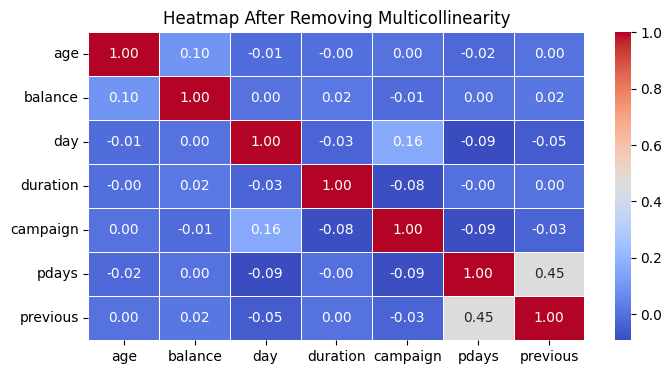

Dropped features to reduce multicollinearity: []


In [ ]:
# Keep only numeric columns
data_numeric = data.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = data_numeric.corr()

# Set threshold for high correlation
threshold = 0.8

# Create mask for upper triangle and extract high correlation pairs
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
high_corr_pairs = (
    pd.DataFrame(corr_matrix.where(mask))
    .stack()
    .reset_index()
    .rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: "Correlation"})
)
high_corr_pairs = high_corr_pairs[high_corr_pairs["Correlation"].abs() > threshold]

# Drop one feature for each high correlation pair
drop_features = high_corr_pairs["Feature 2"].unique()
data_cleaned = data_numeric.drop(columns=drop_features)

# Plot heatmap of the cleaned data
plt.figure(figsize=(8, 4))
sns.heatmap(data_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap After Removing Multicollinearity")
plt.show()

print(f"Dropped features to reduce multicollinearity: {drop_features}")


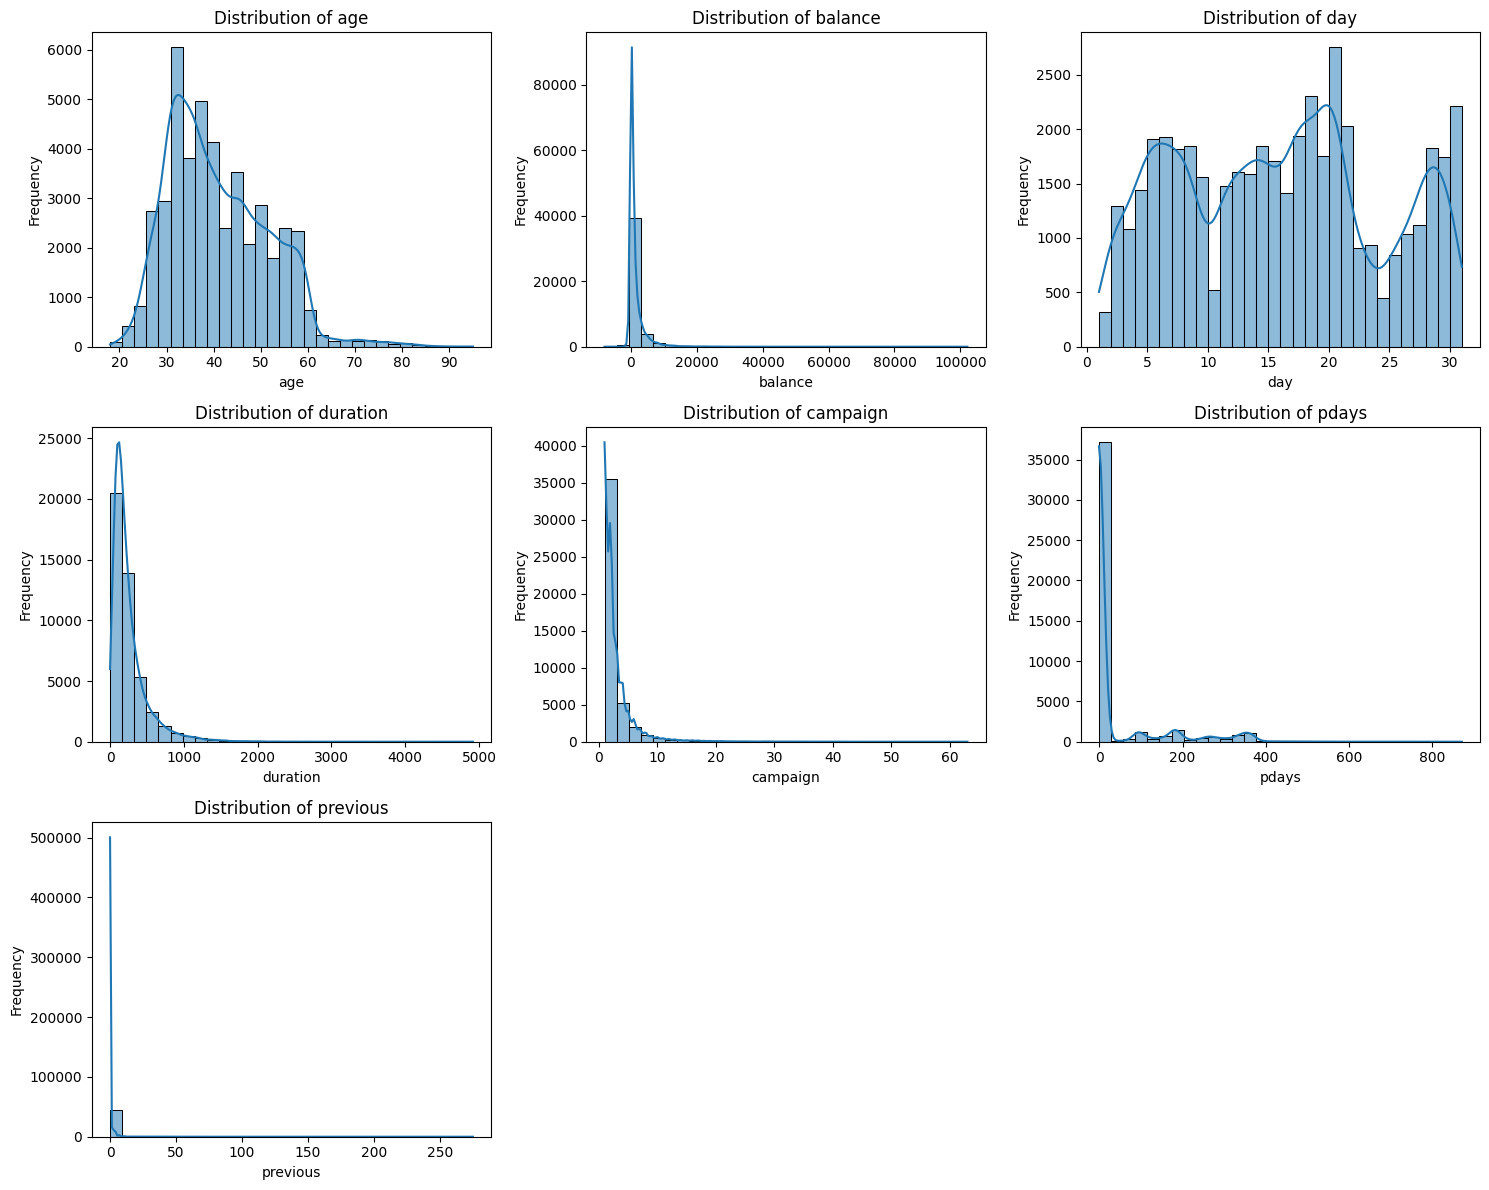

In [ ]:
# Select numerical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Define number of columns for subplots
num_cols = 3  # Number of histograms per row
num_rows = -(-len(numeric_columns) // num_cols)  # Compute required rows (ceiling division)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()  # Flatten in case of multiple rows

# Plot histograms
for i, col in enumerate(numeric_columns):
    sns.histplot(data[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Hide unused subplots (if any)
for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


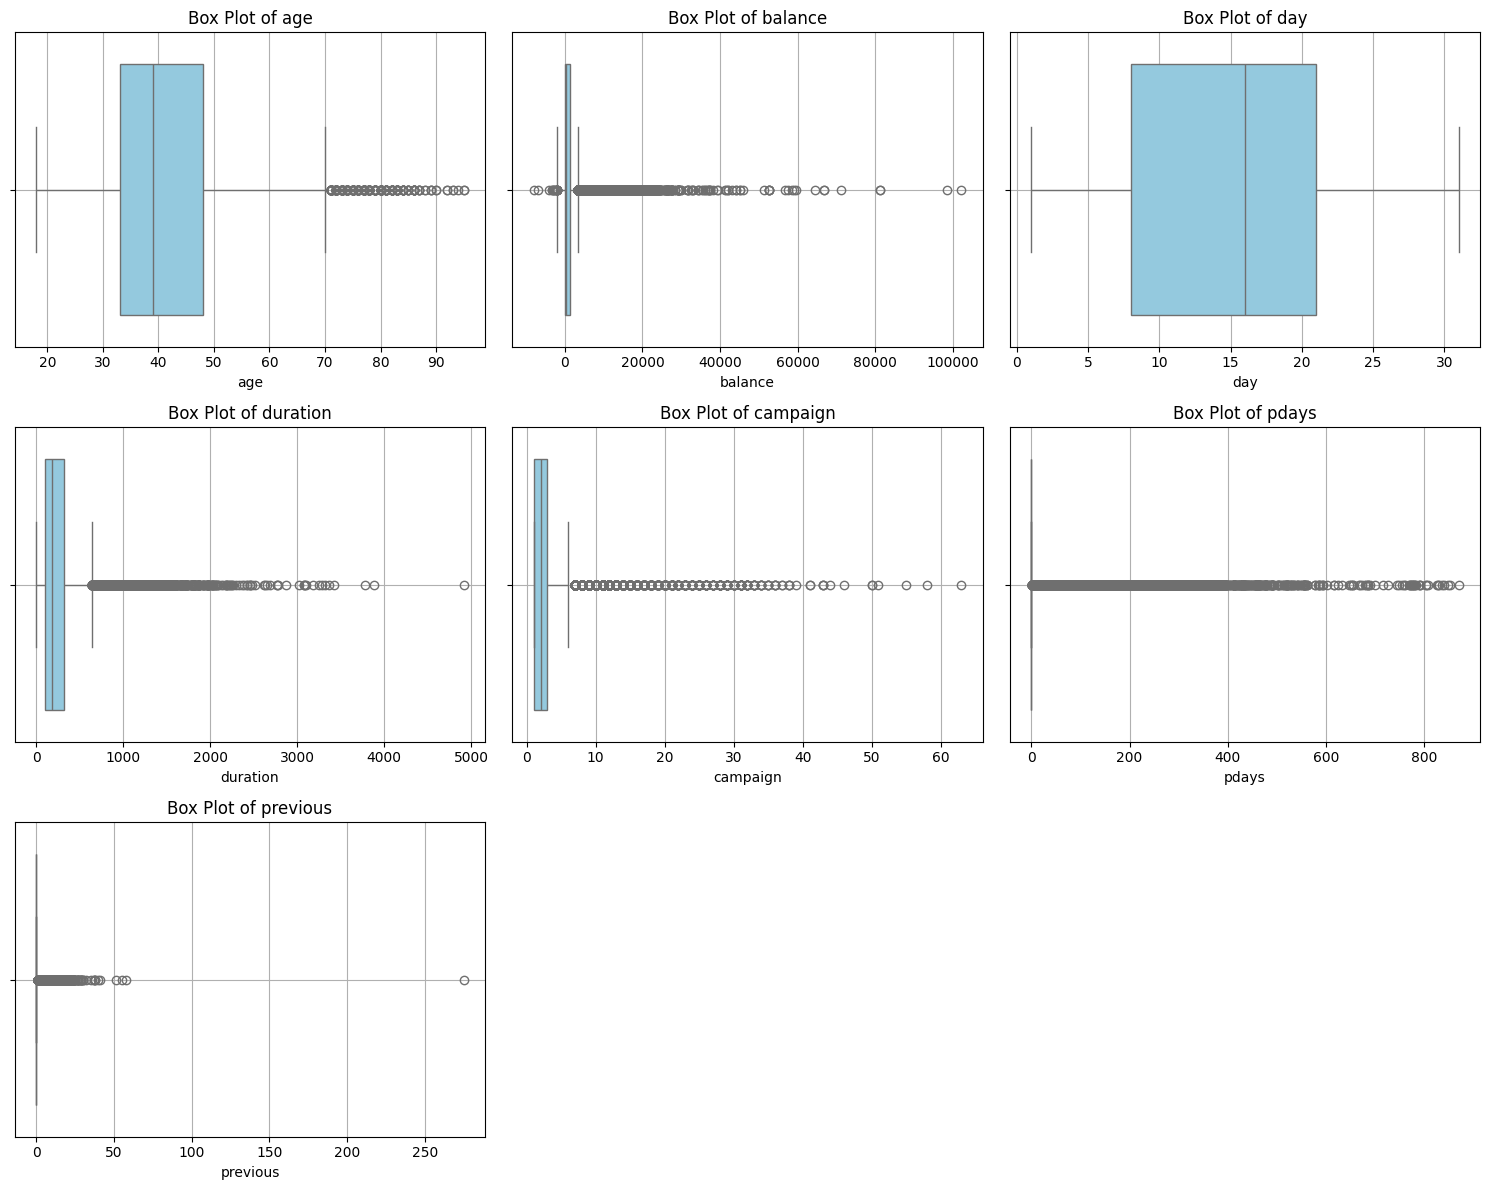

In [ ]:
# Select numerical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Define number of columns for subplots
num_cols = 3  # Number of box plots per row
num_rows = -(-len(numeric_columns) // num_cols)  # Compute required rows (ceiling division)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()  # Flatten in case of multiple rows

# Plot box plots
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=data[col], ax=axes[i], color='skyblue')  # Added color for better visualization
    axes[i].set_title(f"Box Plot of {col}")
    axes[i].set_xlabel(col)
    axes[i].grid(True)  # Added grid for easier value reading

# Hide unused subplots (if any)
for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

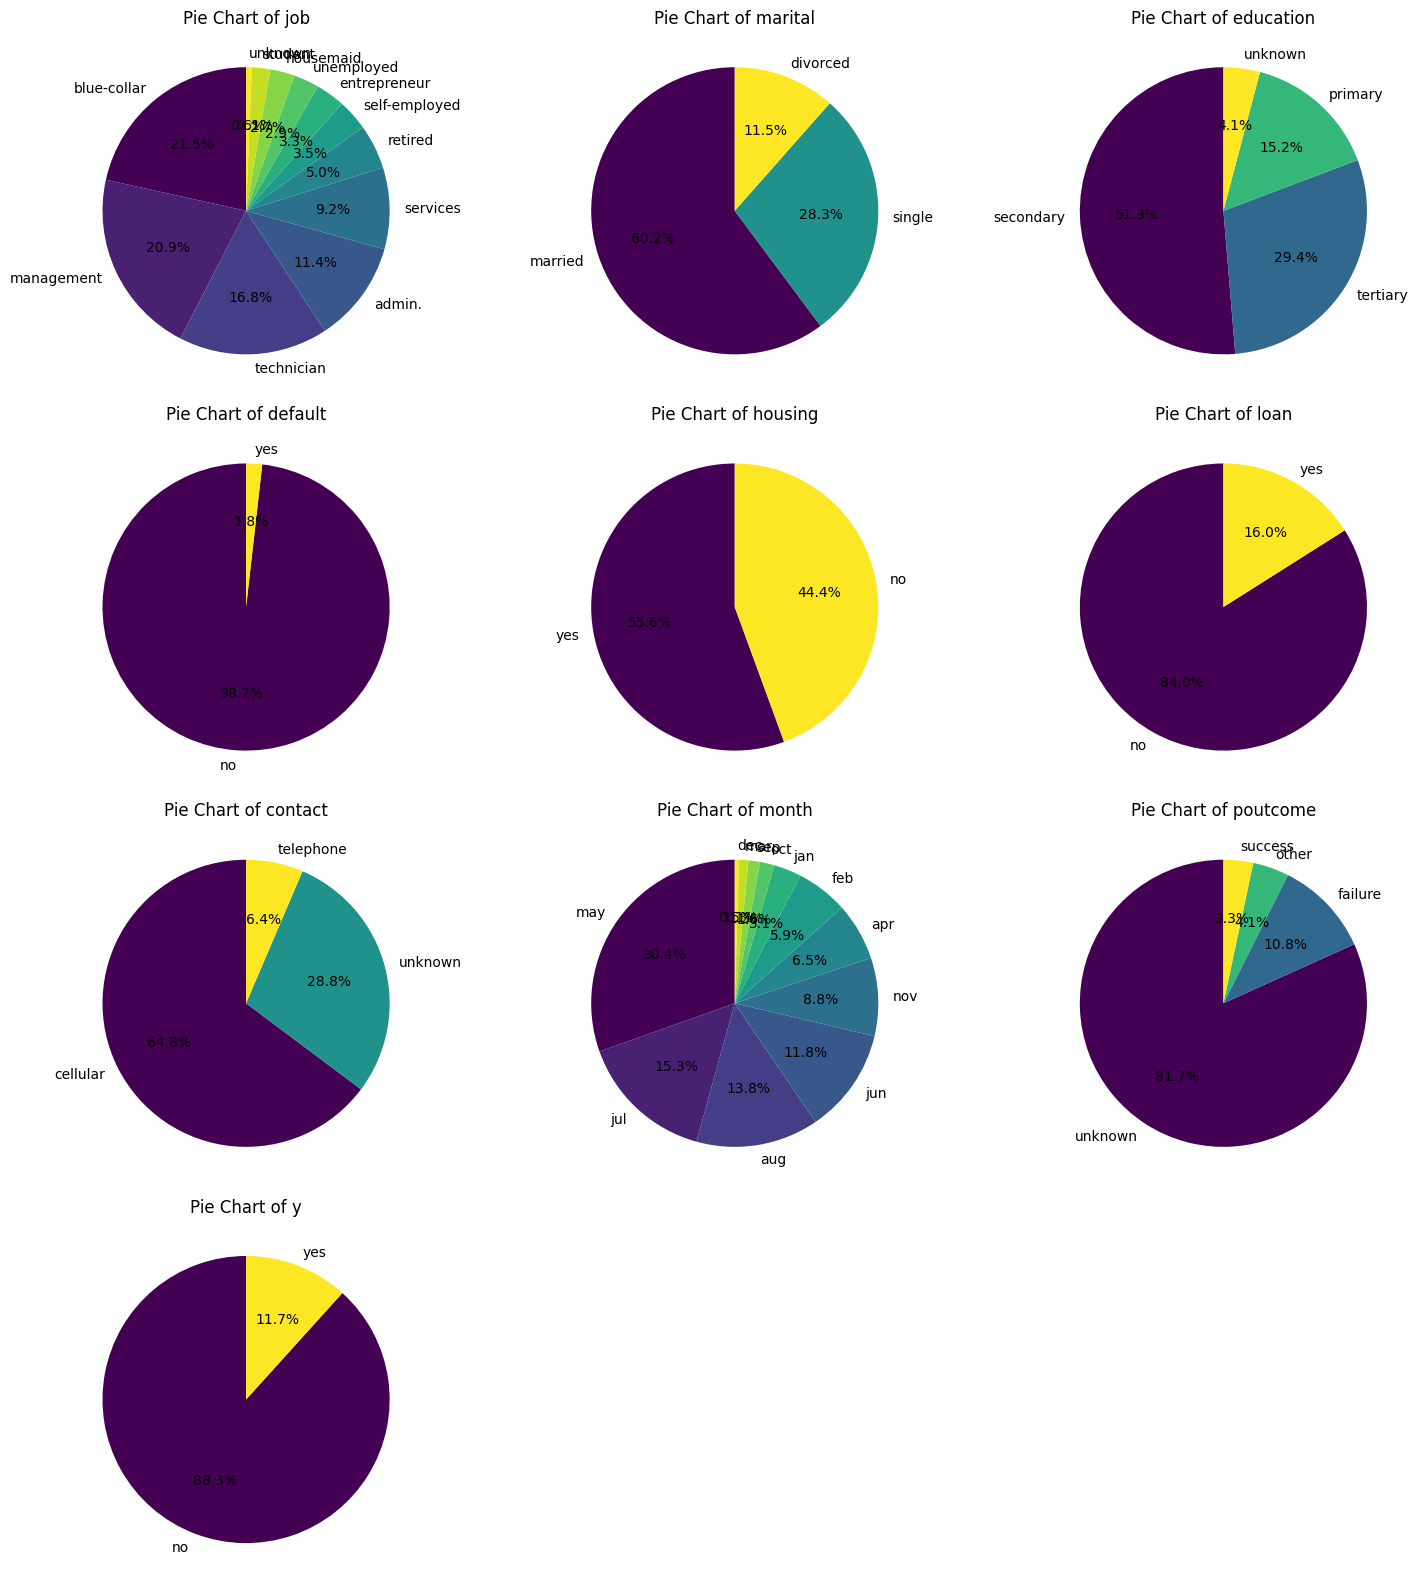

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Select categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Define number of columns for subplots
num_cols = 3  # Number of pie charts per row
num_rows = -(-len(categorical_columns) // num_cols)  # Compute required rows (ceiling division)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()  # Flatten in case of multiple rows

# Plot pie charts
for i, col in enumerate(categorical_columns):
    data[col].value_counts().plot.pie(
        autopct='%1.1f%%', startangle=90, cmap='viridis', ax=axes[i]
    )
    axes[i].set_title(f"Pie Chart of {col}")
    axes[i].set_ylabel("")  # Remove default y-label

# Hide unused subplots (if any)
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

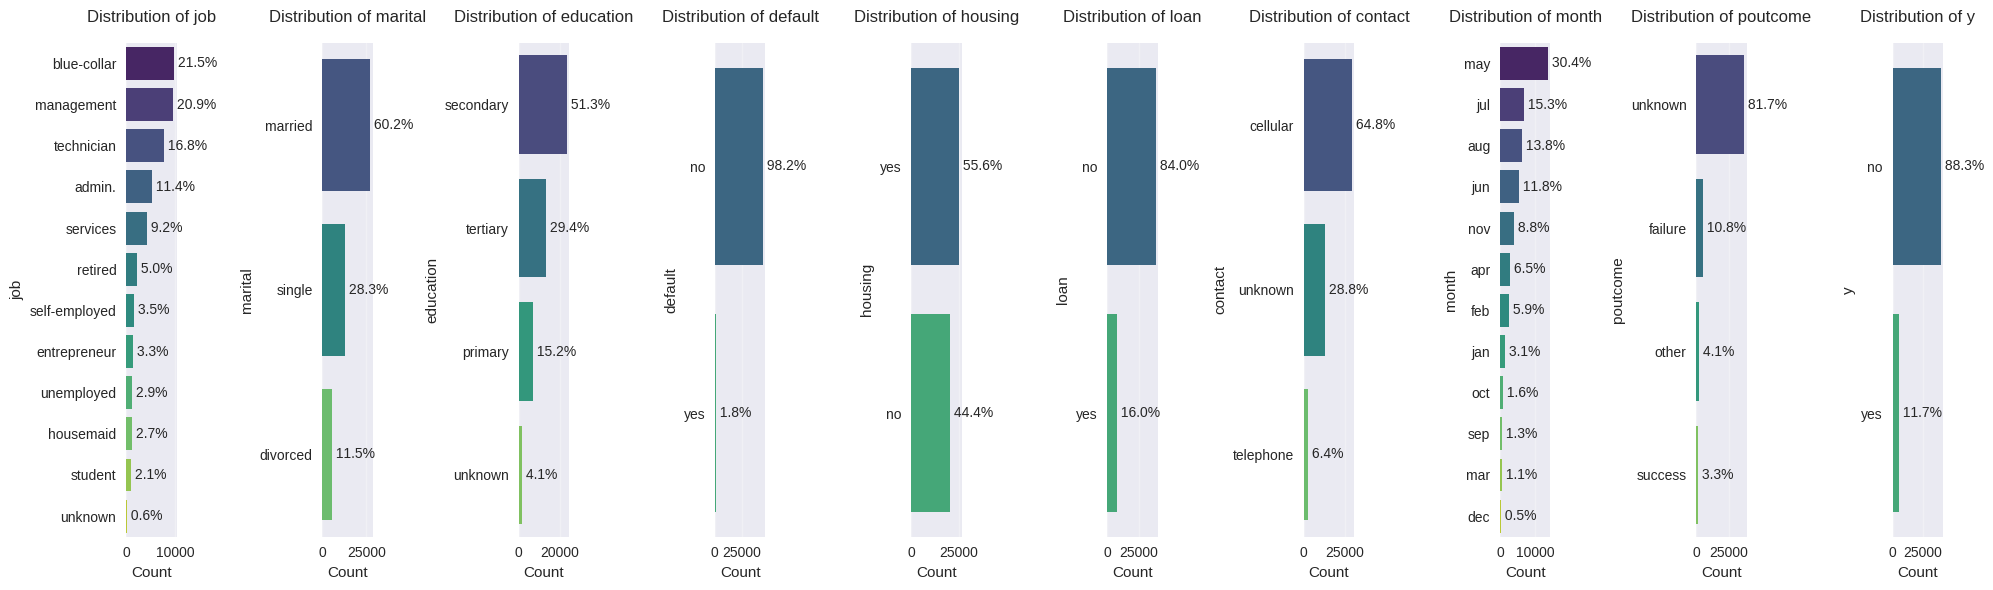

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Set figure size and style
plt.style.use('seaborn-v0_8')  # Using a valid style name
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_columns), figsize=(20, 6))

# Create enhanced bar plots for each categorical column
for ax, col in zip(axes, categorical_columns):
    # Calculate percentages
    value_counts = data[col].value_counts()
    total = len(data[col])
    percentages = (value_counts / total) * 100

    # Create bar plot
    sns.barplot(y=value_counts.index, x=value_counts.values,
                palette="viridis", ax=ax, orient='h')

    # Add percentage labels
    for i, v in enumerate(value_counts.values):
        ax.text(v, i, f' {percentages[i]:.1f}%', va='center')

    # Customize appearance
    ax.set_title(f'Distribution of {col}', pad=15, fontsize=12)
    ax.set_xlabel('Count')
    ax.grid(True, axis='x', alpha=0.3)

    # Rotate x-axis labels if needed
    ax.tick_params(axis='y', labelsize=10)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
data.shape

(45211, 17)

In [ ]:
# Define numeric features
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns

# Outlier detection using IQR
Q1 = data[numeric_features].quantile(0.25)  # First quartile
Q3 = data[numeric_features].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flag rows with outliers
outliers = ((data[numeric_features] < lower_bound) | (data[numeric_features] > upper_bound)).any(axis=1)

# Remove outliers
data_no_outliers = data[~outliers]

print(f"Number of outliers removed: {outliers.sum()}")
print(f"Data shape after removing outliers: {data_no_outliers.shape}")

Number of outliers removed: 17018
Data shape after removing outliers: (28193, 17)


In [ ]:
from scipy.stats import skew

# Check skewness
skewed_features = data[numeric_features].apply(lambda x: skew(x.dropna()))
skewed_features = skewed_features[abs(skewed_features) > 0.75]  # Threshold for high skewness

# Apply log transformation to reduce skewness
for feature in skewed_features.index:
    data[feature] = data[feature].apply(lambda x: np.log1p(x) if x > 0 else x)

In [ ]:
print("Columns in the dataset:")
print(list(data.columns))

# Get list of categorical columns
categorical_columns = data.select_dtypes(include='object').columns.tolist()

if categorical_columns:
    print("\nCategorical columns:")
    print(categorical_columns)

    # One-hot encode categorical columns dropping the first category to avoid multicollinearity
    encoded_data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

    print("\nData after one-hot encoding:")
    display(encoded_data.head())
    print("\nHead rows of categorical columns:")
    display(data[categorical_columns].head())
    # Identify the one-hot encoded columns by finding those present in encoded_data but not in the original data
    encoded_cols = list(set(encoded_data.columns) - set(data.columns))

    print("\nHead of encoded columns:")
    display(encoded_data[encoded_cols].head())
else:
    print("No categorical columns found to encode.")

Columns in the dataset:
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

Categorical columns:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

Data after one-hot encoding:


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,7.670429,5,5.568345,0.693147,-1.0,0.0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,44,3.401197,5,5.023881,0.693147,-1.0,0.0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,33,1.098612,5,4.343805,0.693147,-1.0,0.0,False,True,False,...,False,False,True,False,False,False,False,False,True,False
3,47,7.317876,5,4.532599,0.693147,-1.0,0.0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,33,0.693147,5,5.293305,0.693147,-1.0,0.0,False,False,False,...,False,False,True,False,False,False,False,False,True,False



Head rows of categorical columns:


,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no



Head of encoded columns:


,y_yes,job_retired,month_feb,month_jun,education_unknown,loan_yes,marital_single,education_secondary,month_mar,month_sep,...,month_may,month_jan,job_blue-collar,month_nov,month_oct,job_unknown,month_dec,job_self-employed,month_jul,default_yes
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,True,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
4,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,True,False,False,False,False


In [ ]:
# Ensure that numeric_features is defined and contains columns to scale
if numeric_features.size > 0:
    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()
    # Apply scaling using .loc to preserve the rest of the dataframe
    data.loc[:, numeric_features] = scaler.fit_transform(data.loc[:, numeric_features])

    print("Data after Min-Max Scaling (first 5 rows):")
    display(data.head())
else:
    print("No numeric features available for scaling.")

Data after Min-Max Scaling (first 5 rows):


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.519481,management,married,tertiary,no,0.999519,yes,no,unknown,0.133333,may,0.655033,0.0,0.0,0.0,unknown,no
1,0.337662,technician,single,secondary,no,0.998987,yes,no,unknown,0.133333,may,0.590985,0.0,0.0,0.0,unknown,no
2,0.194805,entrepreneur,married,secondary,no,0.998701,yes,yes,unknown,0.133333,may,0.510984,0.0,0.0,0.0,unknown,no
3,0.376623,blue-collar,married,unknown,no,0.999475,yes,no,unknown,0.133333,may,0.533193,0.0,0.0,0.0,unknown,no
4,0.194805,unknown,single,unknown,no,0.998650,no,no,unknown,0.133333,may,0.622679,0.0,0.0,0.0,unknown,no


In [ ]:
# Optimized splitting of features and target variable
target_col = 'y'
if target_col not in data.columns:
    raise KeyError(f"Column '{target_col}' does not exist in the dataframe.")

y = data[target_col]
X = data.drop(columns=target_col)

# Display target variable distribution (in percentages)
print("Target variable distribution (%):")
print(y.value_counts(normalize=True) * 100)

Target variable distribution (%):
y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


In [ ]:
# Split data into training and test sets with stratification to preserve target distribution
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Print shapes of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (31647, 16)
X_test shape: (13564, 16)
y_train shape: (31647,)
y_test shape: (13564,)


In [ ]:
# Convert target labels to numeric values if they are not already
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables using LabelEncoder for binary columns
label_encoders = {}
# Identify binary columns (those with exactly two unique values)
binary_columns = [col for col in data.columns if data[col].nunique() == 2]

for col in binary_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# One-hot encoding for multi-category columns
# Automatically one-hot encode multi-category columns (non-binary categorical columns)
multi_cat_columns = [col for col in data.columns if data[col].dtype == 'object' and data[col].nunique() > 2]
if multi_cat_columns:
    data = pd.get_dummies(data, columns=multi_cat_columns, drop_first=True)

# Define features (X) and target variable (y)
X = data.drop(columns=["y"])
y = data["y"]
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Decision Tree Classifier Accuracy: 0.8745
Confusion Matrix:
[[7364  588]
 [ 547  544]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.50      0.49      1091

    accuracy                           0.87      9043
   macro avg       0.71      0.71      0.71      9043
weighted avg       0.88      0.87      0.88      9043

Decision Tree Classifier ROC AUC Score: 0.7123


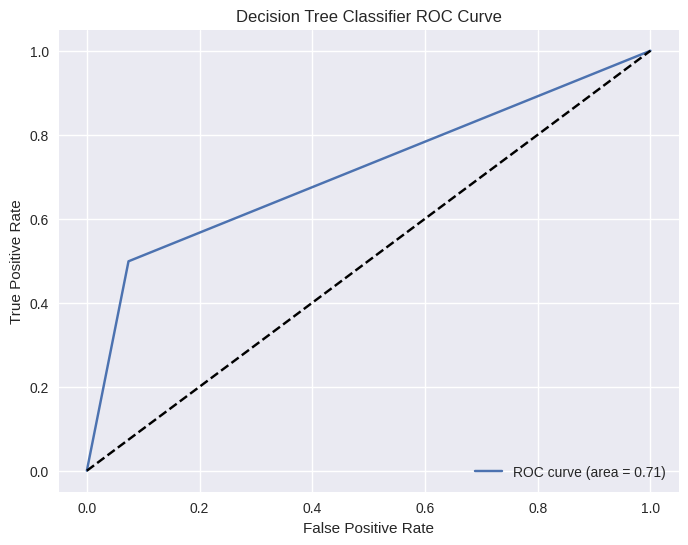

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)
clf_report_dt = classification_report(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)

# Print evaluation metrics
print(f"Decision Tree Classifier Accuracy: {accuracy_dt:.4f}")
print("Confusion Matrix:")
print(cm_dt)
print("Classification Report:")
print(clf_report_dt)
print(f"Decision Tree Classifier ROC AUC Score: {roc_auc_dt:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree Classifier ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Initialize model
dt = DecisionTreeClassifier()

# Perform Grid Search
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Score: 0.9021511472411967


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter grid with distributions
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(np.arange(5, 30, 5)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 6)
}

# Initialize model
dt = DecisionTreeClassifier()

# Perform Randomized Search
random_search = RandomizedSearchCV(dt, param_distributions=param_dist,
                                   n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Best Parameters: {'min_samples_split': 3, 'min_samples_leaf': 4, 'max_depth': 5, 'criterion': 'gini'}
Best Score: 0.9021787982850237



🔹 Summary of Model Performance:
| Method             |   Accuracy |   ROC AUC |   Precision |   Recall |   F1 Score |
|:-------------------|-----------:|----------:|------------:|---------:|-----------:|
| Default            |   0.875705 |  0.714219 |    0.485359 | 0.501375 |   0.493237 |
| GridSearchCV       |   0.89749  |  0.843742 |    0.645907 | 0.332722 |   0.439201 |
| RandomizedSearchCV |   0.897379 |  0.843655 |    0.645276 | 0.331806 |   0.438257 |

📌 Best Parameters for GridSearchCV:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}

📌 Best Parameters for RandomizedSearchCV:
{'min_samples_split': 3, 'min_samples_leaf': 4, 'max_depth': 5, 'criterion': 'gini'}

🔹 Confusion Matrices:

📌 Default DecisionTreeClassifier:
 [[7372  580]
 [ 544  547]]

📌 GridSearchCV Model:
 [[7753  199]
 [ 728  363]]

📌 RandomizedSearchCV Model:
 [[7753  199]
 [ 729  362]]


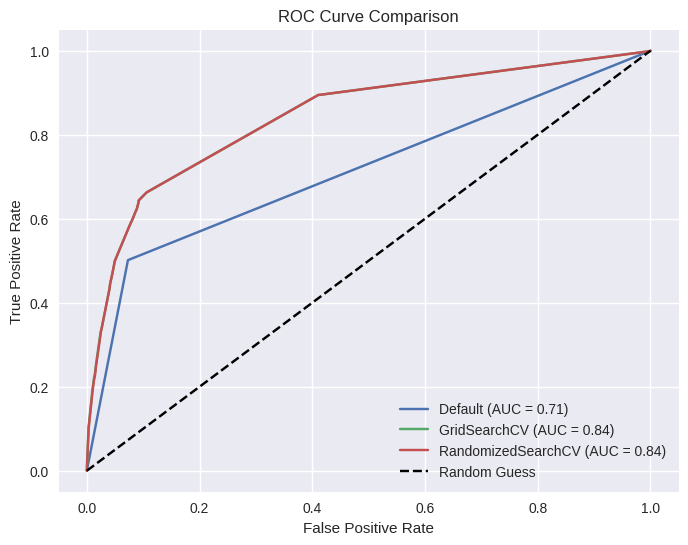

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)

# ---------------------------
# GridSearchCV
# ---------------------------
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

model_grid = grid_search.best_estimator_
y_pred_grid = model_grid.predict(X_test)
y_pred_proba_grid = model_grid.predict_proba(X_test)[:, 1]

# Compute Metrics for GridSearchCV
acc_grid = accuracy_score(y_test, y_pred_grid)
roc_auc_grid = roc_auc_score(y_test, y_pred_proba_grid)
precision_grid = precision_score(y_test, y_pred_grid)
recall_grid = recall_score(y_test, y_pred_grid)
f1_grid = f1_score(y_test, y_pred_grid)
cm_grid = confusion_matrix(y_test, y_pred_grid)

# ---------------------------
# RandomizedSearchCV
# ---------------------------
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(np.arange(5, 30, 5)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 6)
}

random_search = RandomizedSearchCV(dt, param_distributions=param_dist,
                                   n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

model_rand = random_search.best_estimator_
y_pred_rand = model_rand.predict(X_test)
y_pred_proba_rand = model_rand.predict_proba(X_test)[:, 1]

# Compute Metrics for RandomizedSearchCV
acc_rand = accuracy_score(y_test, y_pred_rand)
roc_auc_rand = roc_auc_score(y_test, y_pred_proba_rand)
precision_rand = precision_score(y_test, y_pred_rand)
recall_rand = recall_score(y_test, y_pred_rand)
f1_rand = f1_score(y_test, y_pred_rand)
cm_rand = confusion_matrix(y_test, y_pred_rand)

# ---------------------------
# Default Decision Tree Classifier
# ---------------------------
default_dt = DecisionTreeClassifier()
default_dt.fit(X_train, y_train)
y_pred_default = default_dt.predict(X_test)
y_pred_proba_default = default_dt.predict_proba(X_test)[:, 1]

# Compute Metrics for Default DecisionTreeClassifier
acc_default = accuracy_score(y_test, y_pred_default)
roc_auc_default = roc_auc_score(y_test, y_pred_proba_default)
precision_default = precision_score(y_test, y_pred_default)
recall_default = recall_score(y_test, y_pred_default)
f1_default = f1_score(y_test, y_pred_default)
cm_default = confusion_matrix(y_test, y_pred_default)

# ---------------------------
# Create Summary Table
# ---------------------------
results = pd.DataFrame({
    'Method': ['Default', 'GridSearchCV', 'RandomizedSearchCV'],
    'Accuracy': [acc_default, acc_grid, acc_rand],
    'ROC AUC': [roc_auc_default, roc_auc_grid, roc_auc_rand],
    'Precision': [precision_default, precision_grid, precision_rand],
    'Recall': [recall_default, recall_grid, recall_rand],
    'F1 Score': [f1_default, f1_grid, f1_rand]
})

print("\n🔹 Summary of Model Performance:")
print(results.to_markdown(index=False))  # Pretty table format

print("\n📌 Best Parameters for GridSearchCV:")
print(grid_search.best_params_)

print("\n📌 Best Parameters for RandomizedSearchCV:")
print(random_search.best_params_)

# ---------------------------
# Print Confusion Matrices
# ---------------------------
print("\n🔹 Confusion Matrices:")
print("\n📌 Default DecisionTreeClassifier:\n", cm_default)
print("\n📌 GridSearchCV Model:\n", cm_grid)
print("\n📌 RandomizedSearchCV Model:\n", cm_rand)

# ---------------------------
# Plot ROC Curves for All Models
# ---------------------------
plt.figure(figsize=(8, 6))

# Dictionary to iterate through the models
models = {
    'Default': (y_pred_proba_default, roc_auc_default),
    'GridSearchCV': (y_pred_proba_grid, roc_auc_grid),
    'RandomizedSearchCV': (y_pred_proba_rand, roc_auc_rand)
}

for name, (y_pred_proba, roc_auc) in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

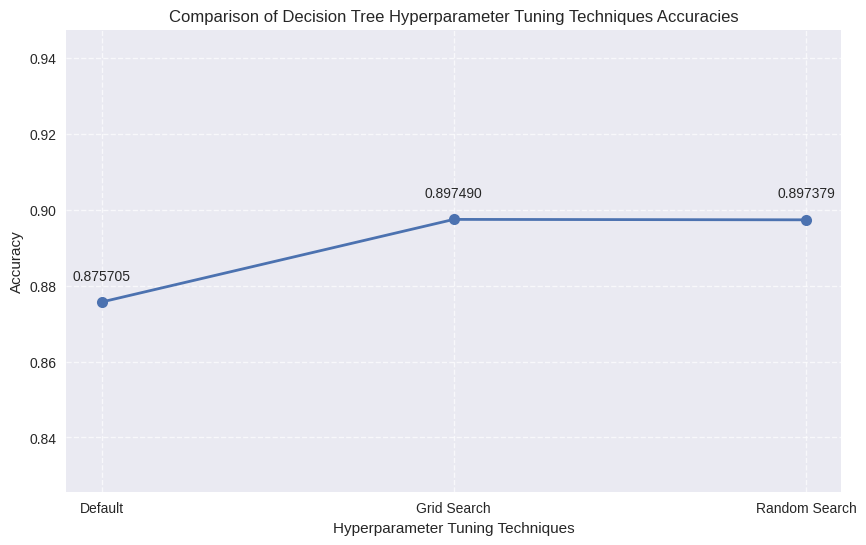

In [ ]:
import matplotlib.pyplot as plt

# Define the hyperparameter tuning techniques and their corresponding accuracy values
tuning_methods = ['Default', 'Grid Search', 'Random Search']
accuracies = [0.875705, 0.89749, 0.897379]  # Keeping the original values

plt.figure(figsize=(10, 6))
plt.plot(tuning_methods, accuracies, marker='o', linestyle='-', linewidth=2, markersize=8, color='C0')

# Annotate each point with its accuracy value (six decimal places)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f'{acc:.6f}', ha='center', va='bottom')

plt.xlabel('Hyperparameter Tuning Techniques')
plt.ylabel('Accuracy')
plt.title('Comparison of Decision Tree Hyperparameter Tuning Techniques Accuracies')
plt.ylim(min(accuracies) - 0.05, max(accuracies) + 0.05)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
